# 2. Quantum Bits, Gates, and Circuits

Kifumi Numata (Apr 19, 2024)

*Approximate QPU time to run this experiment is 5 seconds.*

## 1. Introduction
Bits, gates, and circuits are the basic building blocks of quantum computing. In this introductory module, you will learn quantum computation with circuit model using quantum bits (qubits) and gates. We will also review the foundational concepts of superposition, measurement, and entanglement.

This lesson will cover a lot of content that is also covered in John Watrous's course on [Basics of Quantum Information and Computation](https://learning.quantum.ibm.com/course/basics-of-quantum-information). The topics are presented here more briefly, with less theoretical foundation and more implementation in Qiskit. Wherever more detail would be useful to you, we highly recommend John Watrous's course to supplement this resource.

Key topics in this lesson include:
- Single-qubit gates
- Bloch Sphere
- Superposition
- Measurement
- Two-qubit gates and entanglement
- Circuit depth

All of these are essential prerequisites for utility scale quantum computing.

## 2. Computation as a diagram 

We are using qubits or bits, we need to manipulate them in order to turn the inputs we have into the outputs we need. For the relatively small programs with a few bits, it is useful to represent this process in a diagram known as a *circuit diagram*. 

The bottom left figure is an example of a classical circuit, and the bottom right figure is an example of a quantum circuit. In both cases, the inputs are on the left and the outputs are on the right. Various symbols are used to represent the intermediate operations (or "gates"). The gates are quite different in classical and quantum computing, but some naming and aesthetic features of the classical circuit diagrams are kept for historical reasons.

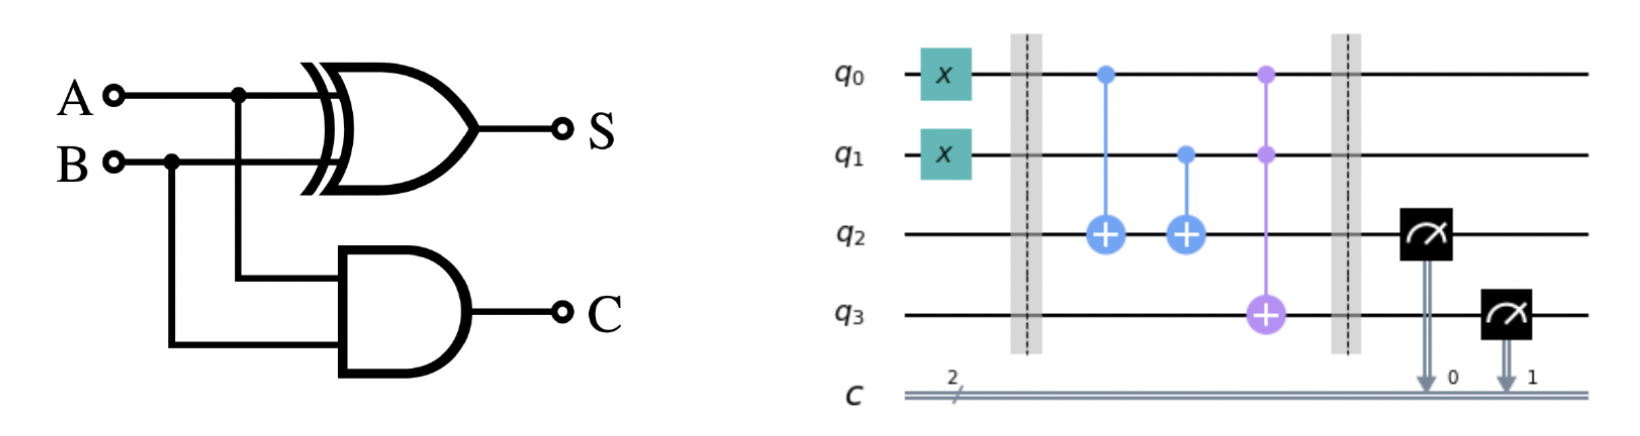

## 3. Single-qubit quantum gate

### 3.1 Quantum state and Bloch sphere

While a classical bit can be in the states 0 or 1, a qubit's state is represented using the notation $|0\rangle$ or $|1\rangle$ or any superposition of those two states. An arbitrary qubit state is written as
$$|\psi\rangle =\alpha|0\rangle+ \beta|1\rangle$$ 
where $\alpha$ and $\beta$ are complex number such that $|\alpha|^2+|\beta|^2=1$.

$|0\rangle$ and $|1\rangle$ are vectors in the two-dimensional complex vector space:
$$|0\rangle = \begin{pmatrix}
1 \\
0
\end{pmatrix}, 
|1\rangle = \begin{pmatrix}
0\\
1
\end{pmatrix}$$

Therefore, an arbitrary quantum state is also represented as 
$$|\psi\rangle = \alpha\begin{pmatrix}
1 \\
0
\end{pmatrix}+ \beta\begin{pmatrix}0\\
1
\end{pmatrix} = \begin{pmatrix}
\alpha \\
\beta
\end{pmatrix}$$
From this, we can see that the state of a qubit is a unit vector in a two-dimensional complex inner product space with an orthonormal basis of $|0\rangle$ and $|1\rangle$. It is normalized to 1.
$$\langle\psi|\psi\rangle = \begin{pmatrix}
\alpha^* & \beta^*
\end{pmatrix}
\begin{pmatrix}
\alpha \\
\beta
\end{pmatrix} = 1$$
$|\psi\rangle =\begin{pmatrix}
\alpha \\
\beta
\end{pmatrix}$ is also called the state vector.

Note here that $\langle\psi|$ is the transpose conjugate of $|\psi\rangle$ (the matrix is transposed and the elements are complex conjugated).

Because of well-known trigonometric identities, a single qubit's state can also be represented as
$$|\psi\rangle =\cos\frac{\theta}{2}|0\rangle+e^{i\varphi}\sin\frac{\theta}{2}|1\rangle= 
\left(
\begin{matrix}
\cos\frac{\theta}{2}\\
e^{i\varphi}\sin\frac{\theta}{2}
\end{matrix}
\right)
$$
where $\theta$ and $\varphi$ are the angles of the sphere below. This sphere used to illustrate quantum states is called the *Bloch sphere*.

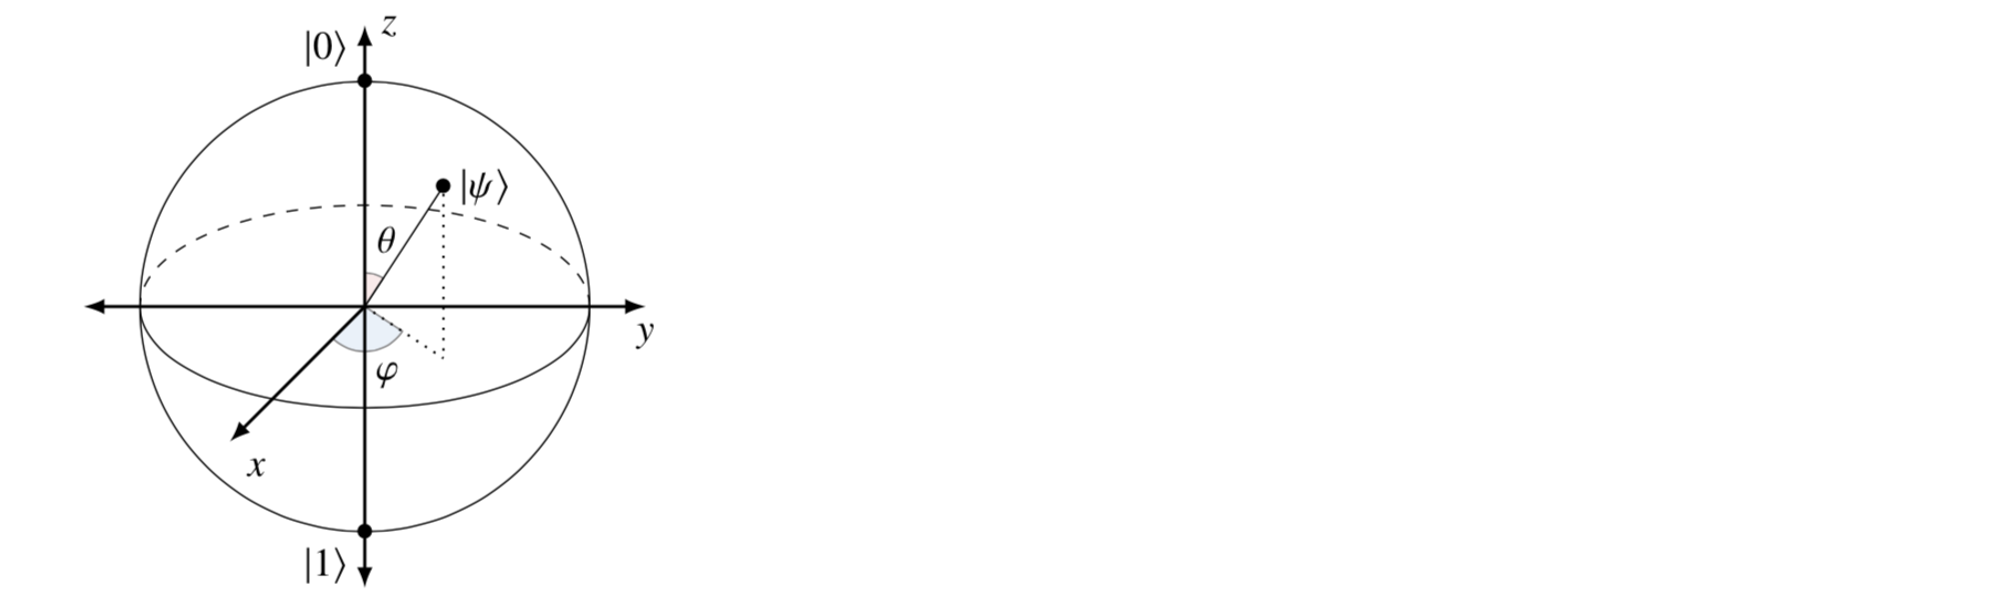

In the next few code cells, we will build up basic calculations from constituent pieces in Qiskit. We'll construct an empty circuit and then add quantum operations, discussing the gates and visualizing their effects as we go.    
You can run the cell by "Shift" + "Enter". Import the library first.

In [1]:
# Import the qiskit libraty
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from qiskit_ibm_runtime import Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram

#### Preparing the quantum circuit
We will create and draw a single-qubit circuit.

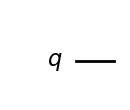

In [2]:
# Create the single-qubit quantum circuit
qc = QuantumCircuit(1)

# Draw the circuit
qc.draw(output="mpl")

#### X gate

The X gate is a $\pi$ rotation around the $x$ axis in the Bloch sphere picture.

Applying the X gate to $|0\rangle$ results in $|1\rangle$, and applying the X gate to $|1\rangle$ results in $|0\rangle$, so it is an operation similar to the classical NOT gate, and is also known as a *bit flip*. The matrix representation of the X gate is below.

$$X = \begin{pmatrix}
0 & 1 \\
1 & 0 \\
\end{pmatrix}$$

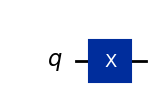

In [3]:
qc = QuantumCircuit(1)    # Prepare the single-qubit quantum circuit

# Apply a X gate to qubit 0
qc.x(0)

# Draw the circuit
qc.draw(output="mpl")

In IBM Quantum, the initial state is set to $|0\rangle$, so the quantum circuit above in matrix representation is

$X|0\rangle=  \begin{pmatrix}
0 & 1 \\\
1 & 0
\end{pmatrix} 
\begin{pmatrix}
1 \\\
0
\end{pmatrix} 
 =\begin{pmatrix}
0 \\\
1
\end{pmatrix} = |1\rangle$ 

Next, let's run this circuit using a state vector simulator.

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


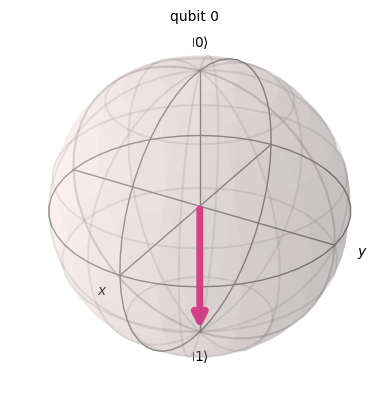

In [4]:
# See the statevector
out_vector = Statevector(qc)
print(out_vector)

# Draw a Bloch sphere
plot_bloch_multivector(out_vector)

Vertical vector is displayed as row vector, with complex numbers (the imaginary part is indexed by $j$ ).

#### H gate
The Hadamard gate is a $\pi$ rotation around an axis halfway between the $x$ and $z$ axes on the Bloch sphere. Applying the H gate to $|0\rangle$ creates a superposition state such as $\frac{|0\rangle + |1\rangle}{\sqrt{2}}$. The matrix representation of the H gate is below.

$$H = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}$$

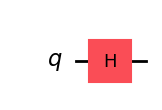

In [5]:
qc = QuantumCircuit(1)    # Create the single-qubit quantum circuit

# Apply an Hadamard gate to qubit 0
qc.h(0)

# Draw the circuit
qc.draw(output="mpl")

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


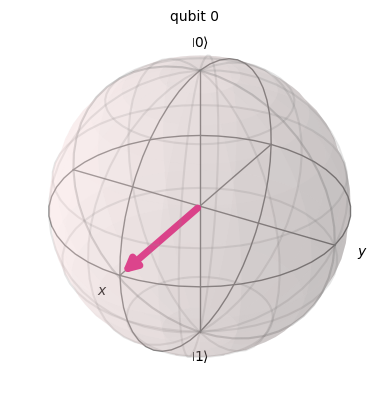

In [6]:
# See the statevector
out_vector = Statevector(qc)
print(out_vector)

# Draw a Bloch sphere
plot_bloch_multivector(out_vector)

This is 
$$H|0\rangle= \frac{1}{\sqrt{2}} \begin{pmatrix}
1 & 1 \\\
1 & -1
\end{pmatrix} 
\begin{pmatrix}
1 \\\
0
\end{pmatrix} 
 =\frac{1}{\sqrt{2}}\begin{pmatrix}
1 \\\
1
\end{pmatrix} 
=\begin{pmatrix}
0.707 \\\
0.707
\end{pmatrix} 
=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)
$$
This superposition state is so common and important, that it is given its own symbol:
$$
|+\rangle \equiv \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle).
$$

By applying the $H$ gate on the $|0\rangle$, we created a superposition of $|0\rangle$ and $|1\rangle$ where measurement in the computational basis (along z in the Bloch sphere picture) would give you each state with equal probabilities.

#### $|-\rangle$ state

You may have guessed that there is a corresponding  $|-\rangle$ state: 
$$
|-\rangle \equiv \frac{|0\rangle -|1\rangle}{\sqrt{2}}.
$$
To create this state, first apply an X gate to make $|1\rangle$, then apply an H gate.

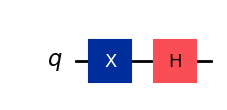

In [7]:
qc = QuantumCircuit(1)    # Create the single-qubit quantum circuit

# Apply a X gate to qubit 0
qc.x(0)

# Apply an Hadamard gate to qubit 0
qc.h(0)

# draw the circuit
qc.draw(output="mpl")

Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))


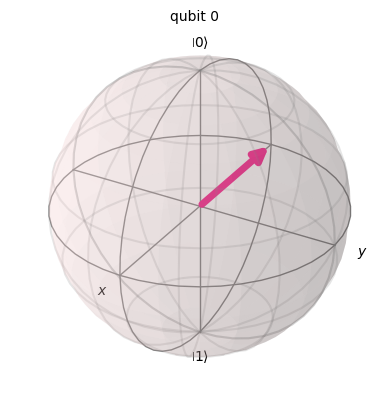

In [8]:
# See the statevector
out_vector = Statevector(qc)
print(out_vector)

# Draw a Bloch sphere
plot_bloch_multivector(out_vector)

This is 

$H|1\rangle= \frac{1}{\sqrt{2}} \begin{pmatrix}
1 & 1 \\\
1 & -1
\end{pmatrix} 
\begin{pmatrix}
0 \\\
1
\end{pmatrix} 
 =\frac{1}{\sqrt{2}}\begin{pmatrix}
1 \\\
-1
\end{pmatrix} 
=\begin{pmatrix}
0.707 \\\
-0.707
\end{pmatrix} 
=\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle) = |-\rangle$



Applying the $H$ gate on $|1\rangle$ results in an equal superposition of $|0\rangle$ and $|1\rangle$, but the sign of $|1\rangle$ is negative.

### 3.2 Single-qubit quantum state and unitary evolution

The actions of all the gates we have seen so far have been *unitary*, which means they can be represented by a unitary operator. In other words, the output state can be obtained by acting on the initial state with a unitary matrix:

$$|\psi^{'}\rangle = U|\psi\rangle$$

A unitary matrix is a matrix satisfying

$$U^{\dagger}U =U U^{\dagger} = I$$

In terms of quantum computer operation, we would say that applying a quantum gate to the qubit evolves the quantum state. Common single-qubit gates include the following.

Pauli gates:

$$X = \begin{pmatrix}
0 & 1 \\
1 & 0 \\
\end{pmatrix}
= |0\rangle \langle 1|+|1\rangle \langle 0|$$
$$Y = \begin{pmatrix}
0 & -i \\
-i & 0 \\
\end{pmatrix}
= -1|0\rangle \langle 1|+i|1\rangle \langle 0|$$
$$Z = \begin{pmatrix}
1 & 0 \\
0 & -1 \\
\end{pmatrix}
= |0\rangle \langle 0|-|1\rangle \langle 1|$$

where the outer product was calculated as follows:
$$|0\rangle \langle 0|= 
\begin{bmatrix}
1 \\
0
\end{bmatrix}
\begin{bmatrix}
1 & 0
\end{bmatrix}
=\begin{bmatrix}
1 & 0 \\
0 & 0 \\
\end{bmatrix}, \quad
|1\rangle \langle 0|= 
\begin{bmatrix}
0 \\
1
\end{bmatrix}
\begin{bmatrix}
1 & 0
\end{bmatrix}
=\begin{bmatrix}
0 & 0 \\
1 & 0 \\
\end{bmatrix}, \quad$$

$$|0\rangle \langle 1|= 
\begin{bmatrix}
1 \\
0
\end{bmatrix}
\begin{bmatrix}
0 & 1
\end{bmatrix}
=\begin{bmatrix}
0 & 1 \\
0 & 0 \\
\end{bmatrix}, \quad
|1\rangle \langle 1|= 
\begin{bmatrix}
0 \\
1
\end{bmatrix}
\begin{bmatrix}
0 & 1
\end{bmatrix}
=\begin{bmatrix}
0 & 0 \\
0 & 1 \\
\end{bmatrix}, \quad$$

Other typical single-qubit gates:
$$H= \frac{1}{\sqrt{2}}\begin{bmatrix}
1 & 1 \\
1 & -1 \\
\end{bmatrix},\quad
S = \begin{bmatrix}
1 & 0 \\
0 & -i \\
\end{bmatrix}, \quad
T = \begin{bmatrix}
1 & 0 \\
0 & exp(i\pi/4) \\
\end{bmatrix}$$

$$ R_x(\theta) = e^{-i\theta X/2} = cos\frac{\theta}{2}I - i sin \frac{\theta}{2}X = \begin{bmatrix}
cos\frac{\theta}{2} &  -i sin \frac{\theta}{2} \\
-i sin \frac{\theta}{2} & cos\frac{\theta}{2} \\
\end{bmatrix}$$

$$ R_y(\theta) = e^{-i\theta Y/2} = cos\frac{\theta}{2}I - i sin \frac{\theta}{2}Y = \begin{bmatrix}
cos\frac{\theta}{2} &  - sin \frac{\theta}{2} \\
sin \frac{\theta}{2} & cos\frac{\theta}{2} \\
\end{bmatrix}$$

$$ R_z(\theta) = e^{-i\theta Z/2} = cos\frac{\theta}{2}I - i sin \frac{\theta}{2}Z = \begin{bmatrix}
e^{-i\theta /2} &  0 \\
0 & e^{i\theta /2} \\
\end{bmatrix}$$

Once again, the meaning and use of these are described in more detail in [Basics of Quantum Information](https://learning.quantum.ibm.com/course/basics-of-quantum-information)

### Exercise 1

Use Qiskit to create quantum circuits that prepare the states described below. Then run each circuit using the statevector simulator and display the resulting state on the Bloch sphere. As a bonus, see if you can anticipate what the final state should be based on intuition about the gates and rotations in the Bloch sphere.

(1) $XX|0\rangle$

(2) $HH|0\rangle$  

(3) $HZH|0\rangle$

Tips: Z gate can be used by;

    qc.z(0)
    
__Solution:__

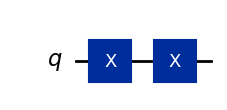

In [9]:
### (1) XX|0> ###

# Create the single-qubit quantum circuit
qc = QuantumCircuit(1)##your code goes here##

# Add a X gate to qubit 0
qc.x(0)##your code goes here##

# Add a X gate to qubit 0
qc.x(0)##your code goes here##

# Draw a circuit
qc.draw(output="mpl")

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


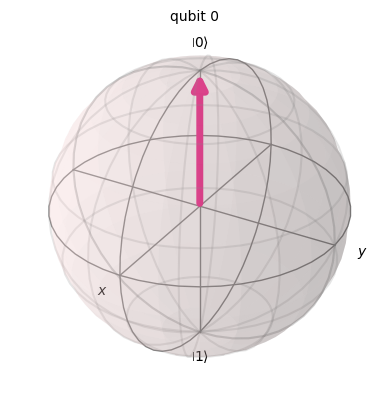

In [10]:
# See the statevector
out_vector = Statevector(qc)
print(out_vector)

# Draw a Bloch sphere
plot_bloch_multivector(out_vector)

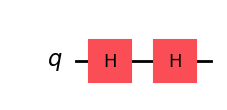

In [11]:
### (2) HH|0> ###
##your code goes here##
qc = QuantumCircuit(1)
qc.h(0)
qc.h(0)
qc.draw("mpl")

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


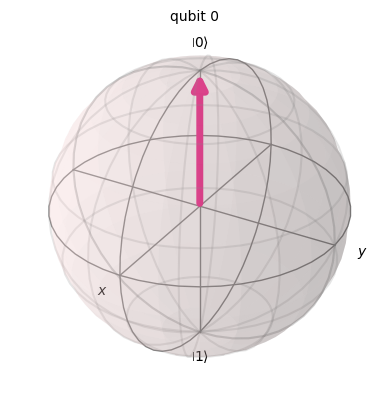

In [12]:
# See the statevector
out_vector = Statevector(qc)
print(out_vector)

# Draw a Bloch sphere
plot_bloch_multivector(out_vector)

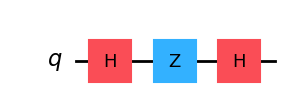

In [13]:
### (3) HZH|0> ###
##your code goes here##
qc = QuantumCircuit(1)
qc.h(0)
qc.z(0)
qc.h(0)
qc.draw("mpl")

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


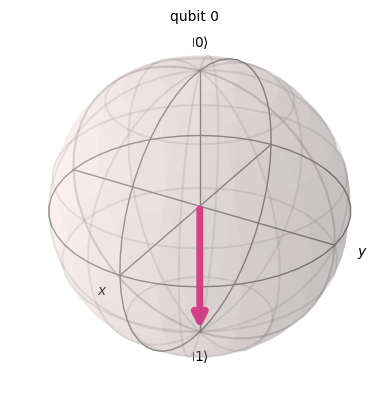

In [14]:
# See the statevector
out_vector = Statevector(qc)
print(out_vector)

# Draw a Bloch sphere
plot_bloch_multivector(out_vector)

### 3.3 Measurement

Measurement is theoretically a very complicated topic. But in practical terms, making a measurement along $z$ (as all IBM quantum computers do) simply forces the qubit’s state $\alpha|0\rangle+\beta|1\rangle \quad (s.t.|\alpha|^2+|\beta|^2=1)$ either to $|0\rangle$ or to $|1\rangle,$ and we observe the outcome.
- $|\alpha|^2$ is the probability we will get $|0\rangle$ when we measure.
- $|\beta|^2$ is the probability we will get $|1\rangle$ when we measure.

So, $\alpha$ and $\beta$ are called probability amplitudes. (see "Born rule")

For example, $\frac{\sqrt{2}}{2}|0\rangle+\frac{\sqrt{2}}{2}|1\rangle$ has an equal probability of becoming $|0\rangle$ or $|1\rangle$ upon measurement. $\frac{\sqrt{3}}{2}|0\rangle-\frac{1}{2}i|1\rangle$ has a 75% chance of becoming $|0\rangle$.

#### Qiskit Aer Simulator
Next, let's measure a circuit that prepares the equal probability superposition above.
We should add the measurement gates, as the Qiskit Aer simulator simulates an ideal (with no noise) quantum hardware by default. Note: The Aer simulator can also apply a noise model based on real quantum computer. We will return to noise models later.

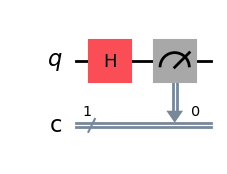

In [15]:
# Create a new circuit with one qubits (first argument) and one classical bits (second argument)
qc = QuantumCircuit(1,1) 
qc.h(0)
qc.measure(0,0) # Add themeasurement gate

qc.draw(output="mpl")

We are now ready to run our circuit on the Aer simulator. In this example, we will apply the default shots=1024, which means we will measure 1024 times. Then we will plot those counts in a histogram.

{'1': 505, '0': 519}


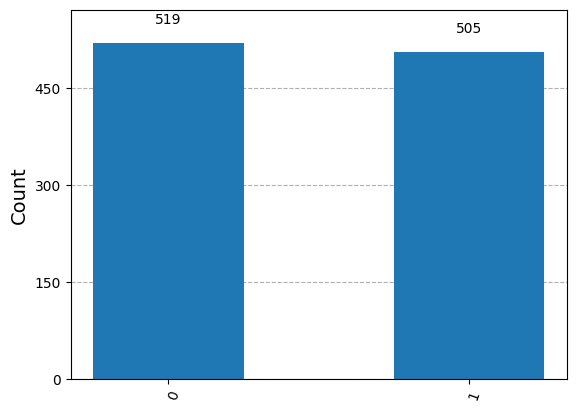

In [16]:
# Run the circuit on a simulator to get the results
# Define backend
backend = AerSimulator()

# Transpile to backend
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pm.run(qc)

# Run the job
sampler = Sampler(mode=backend)
job = sampler.run([isa_qc])
result = job.result()

# Print the results
counts = result[0].data.c.get_counts()
print(counts)

# Plot the counts in a histogram
plot_histogram( counts )

We see that 0s and 1s were measured with a probability of almost 50% each. Although noise has not been simulated here, the states are still probabilistic. So while we expect roughly a 50-50 distribution, we will rarely find exactly that. Just as 100 flips of a coin would rarely yield exactly 50 instances of each side.

## 4. Multi-qubit quantum gate and entanglement

### 4.1 Multi-qubit quantum circuit

We can create a two-qubit quantum circuit with following code. We will apply an H gate to each qubit.

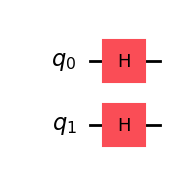

In [17]:
# Create the two qubits quantum circuit
qc = QuantumCircuit(2)

# Apply an H gate to qubit 0
qc.h(0)

# Apply an H gate to qubit 1
qc.h(1)

# Draw the circuit
qc.draw(output="mpl")

In [18]:
# See the statevector
out_vector = Statevector(qc)
print(out_vector)

Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))


The quantum state of the above circuit can be written as a tensor product of single-qubit quantum state.

$|q0\rangle \otimes|q1\rangle = (a|0\rangle+b|1\rangle) \otimes (c|0\rangle+d|1\rangle) $

$= ac|0\rangle|0\rangle+ad|0\rangle|1\rangle+bc|1\rangle|0\rangle+bd|1\rangle|1\rangle$

$= ac|00\rangle+ad|01\rangle+bc|10\rangle+bd|11\rangle$

($|ac|^2+ |ad|^2+ |bc|^2+ |bd|^2=1$ )


The initial state of Qiskit is $|0\rangle|0\rangle=|00\rangle$, so by applying $H$ to each qubit, it changes to a state of equal superposition.

$H|0\rangle \otimes H|0\rangle=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) \otimes \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) = \frac{1}{2}(|00\rangle+|01\rangle+|10\rangle+|11\rangle)$

$$ 
=\frac{1}{2}\left( \begin{pmatrix} 1 \\ 1 \end{pmatrix} \otimes \begin{pmatrix} 1 \\ 1 \end{pmatrix}\right) = \frac{1}{2}\begin{pmatrix} 1 \\ 1 \\ 1 \\ 1 \end{pmatrix}=\frac{1}{2}\left(\begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix}+\begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \end{pmatrix}+\begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix}+\begin{pmatrix} 0 \\ 0 \\ 0 \\ 1 \end{pmatrix}\right)
$$

The measurement rule is also same as a single qubit case, the probability of measuring $|00\rangle$ is $|ac|^2$.

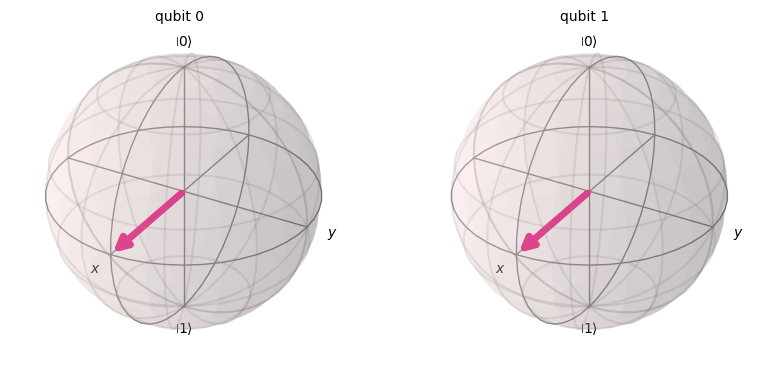

In [19]:
# Draw a Bloch sphere
plot_bloch_multivector(out_vector)

Next, let's measure this circuit.

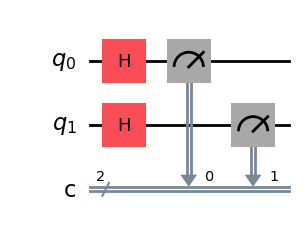

In [20]:
# Create a new circuit with two qubits (first argument) and two classical bits (second argument)
qc = QuantumCircuit(2,2)

# Apply the gates
qc.h(0)
qc.h(1)

# Add the measurement gates
qc.measure(0,0)    # Measure qubit 0 and save the result in bit 0
qc.measure(1,1)    # Measure qubit 1 and save the result in bit 1

# Draw the circuit
qc.draw(output="mpl")

Now, we will use a Aer simulator, again, to experimentally verify that the relative probabilities of all possible output states are roughly equal.

{'01': 268, '10': 253, '00': 255, '11': 248}


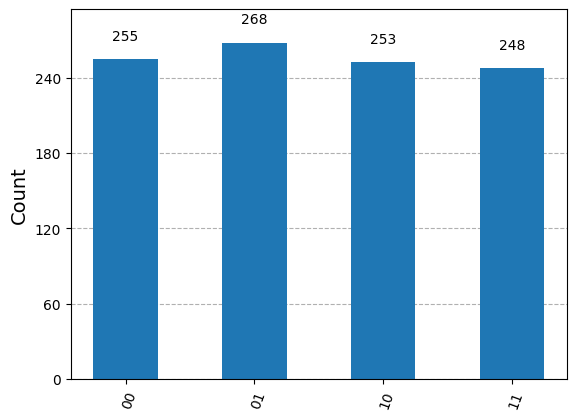

In [21]:
# Run the circuit on a simulator to get the results
# Define backend
backend = AerSimulator()

# Transpile to backend
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pm.run(qc)

# Run the job
sampler = Sampler(mode=backend)
job = sampler.run([isa_qc])
result = job.result()

# Print the results
counts = result[0].data.c.get_counts()
print(counts)

# Plot the counts in a histogram
plot_histogram( counts )

As expected, the states $|00\rangle$, $|01\rangle$, $|10\rangle$, $|11\rangle$ were measured almost 25% each.

### 4.2 Multi-qubit quantum gates
#### CNOT gate

A CNOT("controlled NOT" or CX) gate is a two-qubit gate, meaning its action involves two qubits at once: the control qubit and the target qubit. A CNOT flips the target qubit only when the control qubit is $|1\rangle$.

| Input (target,control) | Output (target,control) |
|:-----------:|:------------:|
| 00          | 00           |
| 01          | 11           |
| 10          | 10           |
| 11          | 01           |

Let us first simulate the action of this two-qubit gate when q0 and q1 are both $|0\rangle$, and obtain the output state vector. The Qiskit syntax used is ```qc.cx(control qubit, target qubit)```.

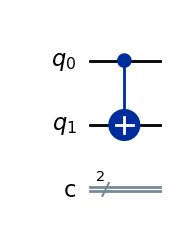

In [ ]:
# Create a circuit with two quantum registers and two classical registers
qc = QuantumCircuit(2,2)

# Apply the CNOT (cx) gate to a |00> state.
qc.cx(0,1)   # Here the control is set to q0 and the target is set to q1.

# Draw the circuit
qc.draw(output="mpl")

In [23]:
# See the statevector
out_vector = Statevector(qc)
print(out_vector)

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


As expected, applying a CNOT gate on $|00\rangle$ did not change the state, since the control qubit was in the $|0\rangle$ state.


#### Note: Qiskit bit ordering

Qiskit uses **Little Endian** notation for qubits' and bits' ordering, meaning **qubit 0 is the rightmost bit** in the bitstrings. Example: $|01\rangle$ means q0 is $|1\rangle$ and q1 is $|0\rangle$. Be careful because most of the literature in quantum computing use the Big Endian notation (qubit 0 is the leftmost bit).




Another thing to notice is that when representing a quantum circuit, $|q_0\rangle$ is always placed at the top of the circuit.


Let's get back to our CNOT operation. This time we will apply a CNOT gate to $|01\rangle$ and see what happens.

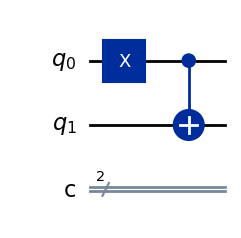

In [24]:
qc = QuantumCircuit(2,2)

# q0=1, q1=0
qc.x(0)    # Apply a X gate to initialize q0 to 1
qc.cx(0,1)   # Set the control bit to q0 and the target bit to q1.

# Draw the circuit
qc.draw(output="mpl")

In [25]:
# See the statevector
out_vector = Statevector(qc)
print(out_vector)

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2))


By applying a CNOT gate, the $|01\rangle$ state has now become $|11\rangle$.

Let us verify these results by running the circuit on a simulator.

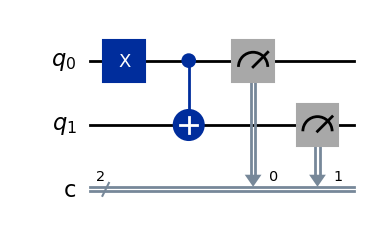

In [26]:
# Add measurements
qc.measure(0,0)
qc.measure(1,1)

# Draw the circuit
qc.draw(output="mpl")

{'11': 1024}


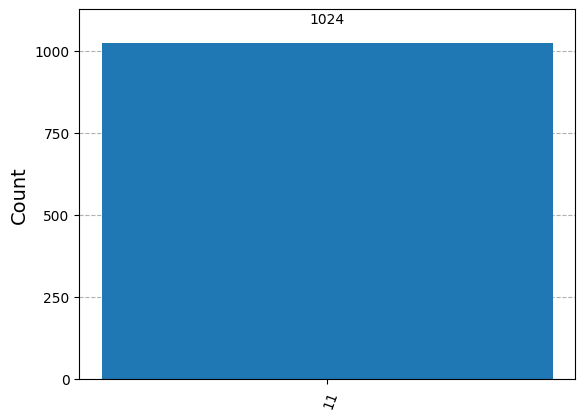

In [27]:
# Run the circuit on a simulator to get the results
# Define backend
backend = AerSimulator()

# Transpile to backend
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pm.run(qc)

# Run the job
sampler = Sampler(backend)
job = sampler.run([isa_qc])
result = job.result()

# Print the results
counts = result[0].data.c.get_counts()
print(counts)

# Plot the counts in a histogram
plot_histogram( counts )

The results should show you that $|11\rangle$ has been measured with 100% probability.

### 4.3 Quantum entanglement and execution on a real quantum device

Let's start by introducing a specific entangled state which is particularly important in quantum computation, then we'll define the term "entangled":

$$\frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|11\rangle$$
and this state is called a **Bell state**.

An entangled state is a state $|\psi_{AB}\rangle$ consisting of quantum states $|\psi_A\rangle$ and $|\psi_B\rangle$ that cannot be represented by a tensor product of individual quantum states.

If $|\psi_{AB}\rangle$ below has two states $|\psi\rangle_A$ and $|\psi\rangle_B$;

$$|\psi_{AB}\rangle = \frac{1}{\sqrt{2}}(|00\rangle +|11\rangle) = \frac{1}{\sqrt{2}}(|0\rangle_A|0\rangle_B +|1\rangle_A|1\rangle_B)$$
$$|\psi\rangle_A = a_0|0\rangle+a_1|1\rangle$$
$$|\psi\rangle_B = b_0|0\rangle+b_1|1\rangle$$

the tensor product of these two states is the following
$$|\psi\rangle _A\otimes |\psi\rangle _B = a_0 b_0|00\rangle+a_0 b_1|01\rangle+a_1 b_0|10\rangle+a_1 b_1|11\rangle$$
but there are no coefficients $a_0, a_1, b_0, $ and $b_1$ to satisfy these two equations. Therefore, $|\psi_{AB}\rangle$ is not represented by a tensor product of individual quantum state, $|\psi\rangle_A$ and $|\psi\rangle_B$, and this means that $|\psi_{AB}\rangle =  \frac{1}{\sqrt{2}}(|00\rangle +|11\rangle)$ is entangled state.

Let us create the Bell state and run it on a real quantum computer. Now we will follow the four steps to writing a quantum program, called **Qiskit Patterns**:

    1. Map problem to quantum circuits and operators
    2. Optimize for target hardware
    3. Execute on target hardware
    4. Post-process the results


#### Step 1. Map problem to quantum circuits and operators

In a quantum program, quantum circuits are the native format in which to represent quantum instructions. When creating a circuit, you'll usually create a new QuantumCircuit object, then add instructions to it in sequence.

The following code cell creates a circuit that produces a Bell state, the specific two-qubit entangled state from above.

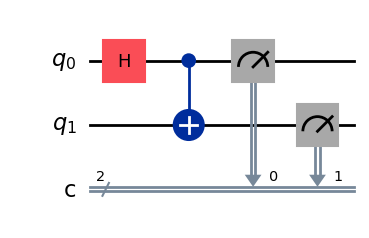

In [46]:
qc = QuantumCircuit(2, 2)

qc.h(0)
qc.cx(0, 1)

qc.measure(0, 0)
qc.measure(1, 1) 

qc.draw("mpl")

#### Step 2. Optimize for target hardware

Qiskit converts abstract circuits to QISA (Quantum Instruction Set Architecture) circuits that respect the constraints of the target hardware and optimizes circuit performance. So before the optimization, we will specify the target hardware.


If you do not have `qiskit-ibm-runtime`, you will need to install this first. For more information about Qiskit Runtime is [here](https://docs.quantum.ibm.com/api/qiskit-ibm-runtime/runtime_service).

In [47]:
# Install
# !pip install qiskit-ibm-runtime

We will specify the target hardware.

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

# If this is your first time running your circuit on a real device, 
# make sure you copy your API Token from [IBM Quantum Platform](https://quantum.ibm.com/) 
# QiskitRuntimeService.save_account(token='<your_token>', overwrite=True)

service = QiskitRuntimeService(channel="ibm_quantum")
service.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('ibm_kyiv')>]

In [ ]:
# You can specifiy the device 
# backend = service.backend('ibm_kyiv')

In [45]:
#You can also identify the least busy device
backend = service.least_busy(operational=True)
print("The least busy device is ", backend)

The least busy device is  <IBMBackend('ibm_kyiv')>


Transpiling the circuit is yet another complex process. Very briefly, this rewrites the circuit into a logically equivalent one using "native gates" (gates that a particular quantum computer can implement) and maps the qubits in your circuit to optimal real qubits on the target quantum computer. For more on transpilation, see this [documentation](https://docs.quantum.ibm.com/api/qiskit/transpiler#overview).

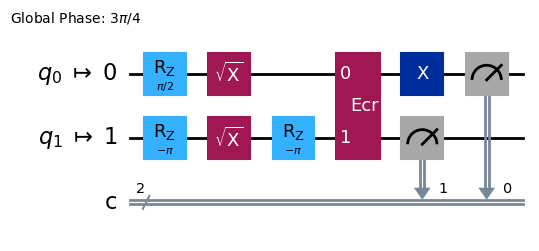

In [48]:
# Transpile the circuit into basis gates executable on the hardware
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
target_circuit = pm.run(qc)

target_circuit.draw("mpl", idle_wires=False)

You can see that in the transpilation the circuit was rewritten using new gates. For more on the ECR gate, please refer this [documentation](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.ECRGate#ecrgate).

#### Step 3. Execute the target circuit

Now, we will run the target circuit on the real device.

In [49]:
sampler = Sampler(backend)
job_real = sampler.run([target_circuit])

print("job id:", job_real.job_id())

job id: cxcvcchpx23g008t6zj0


Execution on the real device may require waiting in a queue, since quantum computers are valuable resources, and very much in demand. The job_id is used to check the execution status and results of the job later.

In [ ]:
# Check the job status (replace the job id below with your own)
job_real.status('cxcvcchpx23g008t6zj0')

You can also check the job status from your IBM Quantum Dashboard：https://quantum.ibm.com/jobs

In [ ]:
# If the Notebook session got disconnected you can also check your job statuse by running the following code
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()   
job_real = service.job('cxcvcchpx23g008t6zj0') # Input your job-id between the quotations
job_real.status()

'DONE'

In [51]:
# Execute after job has successfully run
result_real = job_real.result()
print(result_real[0].data.c.get_counts())

{'11': 1931, '00': 1967, '10': 167, '01': 31}


#### Step 4. Postprocess the results

Finally, we must post-process our results to create outputs in the expected format like values or graphs.

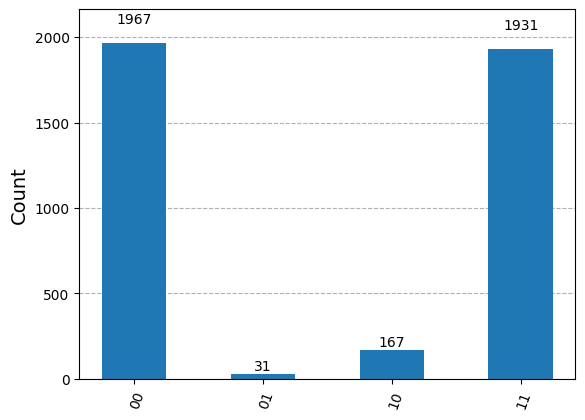

In [52]:
plot_histogram(result_real[0].data.c.get_counts())

As you can see, $|00\rangle$ and $|11\rangle$ are the most frequently observed. There are a few results other than the expected data, and they are due to noise and qubit decoherence. We will learn more about errors and noise in quantum computers in the later lessons of this course.

### 4.4 GHZ state

The concept of entanglement can be extended to systems of more than two qubits. The GHZ state (Greenberger-Horne-Zeilinger state) is a maximally entangled state of three or more qubits. The GHZ state for three qubits is defined as

$$\frac{1}{\sqrt 2}(|000\rangle + |111\rangle)$$

It can be created with the following quantum circuit.

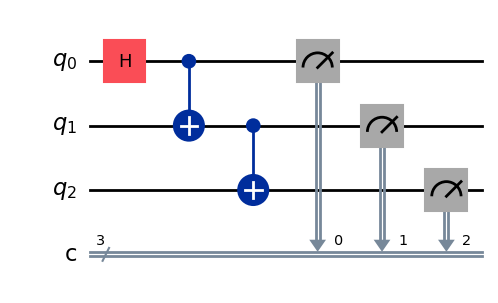

In [39]:
qc = QuantumCircuit(3,3)

qc.h(0)
qc.cx(0,1)
qc.cx(1,2)

qc.measure(0, 0)
qc.measure(1, 1)
qc.measure(2, 2)

qc.draw("mpl")

The "depth" of a quantum circuit is a useful and common metric to describe quantum circuits. Trace a path through the quantum circuit, moving left to right, only changing qubits when they are connected by a multi-qubit gate. Count the number of gates along that path. The maximum number of gates for any such path through a circuit is the depth. In modern noisy quantum computers, low-depth circuits have fewer errors and are likely to return good results. Very deep circuits are not. (This animation might help your understand the "Depth": https://docs.quantum.ibm.com/_next/image?url=%2Fimages%2Fapi%2Fqiskit%2Fdepth.gif&w=1920&q=75 )
 
Using `QuantumCircuit.depth()`, we can check the depth of our quantum circuit. The depth of the above circuit is 4. The top qubit has only 3 gates including the measurement. But there is a path from the top qubit down to either qubit 1 or qubit 2 which involves another CNOT gate. 

In [40]:
qc.depth()

4

### Exercise 2

The GHZ state of an 8-qubit system is

$$\frac{1}{\sqrt 2}(|00000000\rangle + |11111111\rangle).$$


Write code to prepare this state with the shallowest possible circuit. The depth of the shallowest quantum circuit is 5, including the measurement gates.

__Solution__:

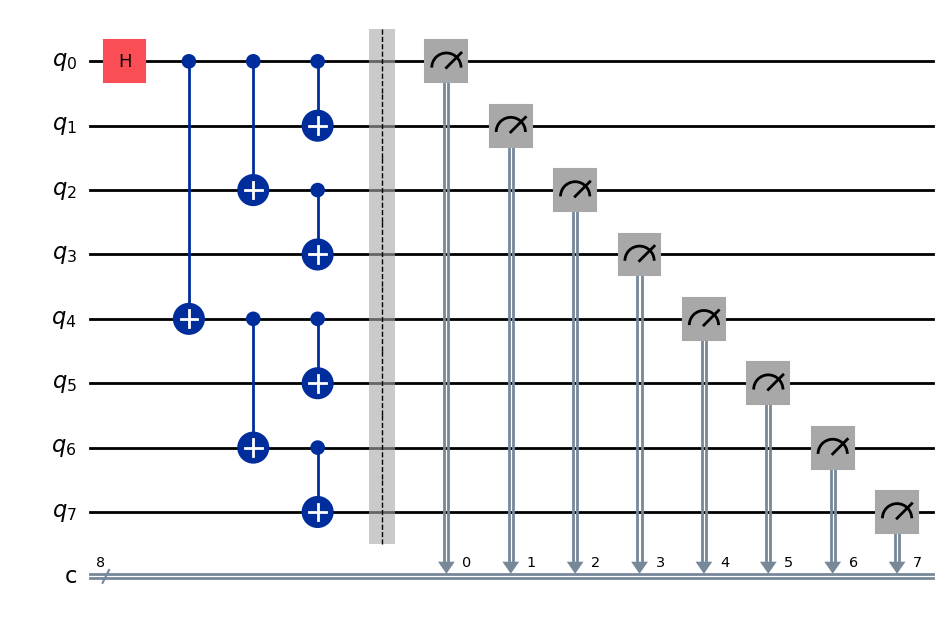

In [41]:
# Step 1
qc = QuantumCircuit(8,8)

##your code goes here##
qc.h(0)
qc.cx(0,4)
qc.cx(4,6)
qc.cx(6,7)

qc.cx(4,5)

qc.cx(0,2)
qc.cx(2,3)

qc.cx(0,1)
qc.barrier() # for visual separation

# measure
for i in range(8):
    qc.measure(i, i)

qc.draw("mpl")
#print(qc.depth())

In [42]:
print(qc.depth())

5


{'00000000': 524, '11111111': 500}


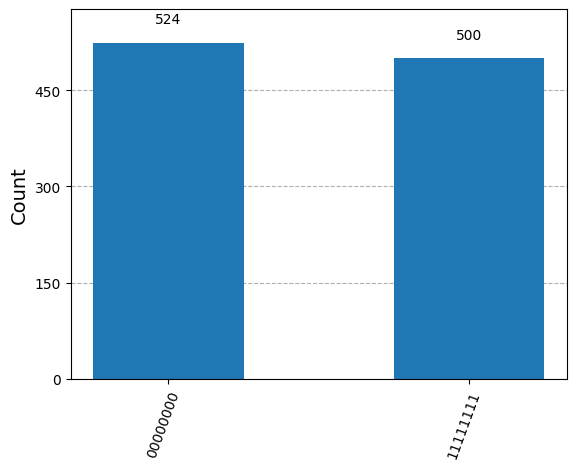

In [43]:
# Step 2
# For this exercise, the circuit and operators are simple, so no optimizations are needed.

# Step 3
# Run the circuit on a simulator to get the results
backend = AerSimulator()

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pm.run(qc)

sampler = Sampler(mode=backend)
job = sampler.run([isa_qc], shots=1024)
result = job.result()

counts = result[0].data.c.get_counts()
print(counts)

# Step 4
# Plot the counts in a histogram
from qiskit.visualization import plot_histogram
plot_histogram( counts )

## 5. Summary

You have learned Quantum computation with circuit model using quantum bits and gates, and also reviewed superposition, measurement, and entanglement. You also have learned the method to execute the quantum circuit on the real quantum device.

In the final exercise to create a GHZ circuit, you have tried to reduce the circuit depth, which is an important factor for obtaining a utility scale solution in a noisy quantum computer.  In the later lessons of this course, you will learn about noise and about error mitigation methods in detail. In this lesson, as an introduction, we considered reducing the circuit depth in an ideal device, but in reality, we must consider the constraints of real device, such as qubit connectivity.  You will learn more about this in subsequent lessons in this course.

In [53]:
# See the version of Qiskit
import qiskit
qiskit.__version__

'1.3.0'